<a href="https://colab.research.google.com/github/Nishanthravula/python/blob/master/LaneDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [0]:
image = cv2.imread("lane3.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converts from BGR to RGB

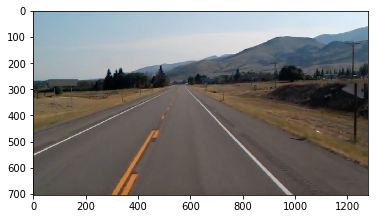

In [0]:
plt.imshow(img)
plt.show()

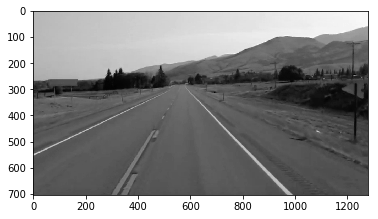

In [0]:
lane_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# combo_image = cv2.addWeighted(lane_image,0.8,line_image,1,1)

plt.imshow(lane_image,plt.cm.gray)
plt.show()

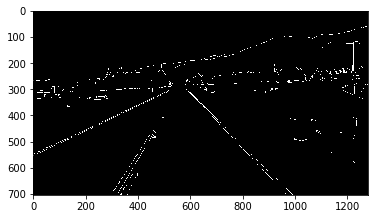

In [0]:
canny = cv2.Canny(lane_image,50,150)



plt.imshow(canny,plt.cm.gray)
plt.show()

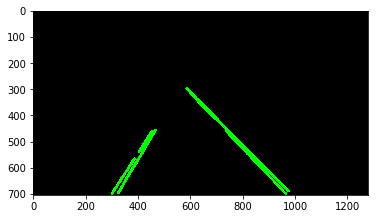

In [0]:
triangle = np.array([(200,700),(1100,700),(550,250)])
mask = np.zeros_like(canny)
cv2.fillPoly(mask,np.int32([triangle]),255)
cropped_image = cv2.bitwise_and(canny,mask)

lines = cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)

line_image = np.zeros_like(image)
if lines is not None:
    for line in lines:
#             print(line.shape)
        x1,y1,x2,y2 = line[0]
        cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),10)
 

plt.imshow(line_image,plt.cm.gray)
plt.show()